## Chapter 6. 신경망 - SUV 구매 예측

## 실습 6 - SUV 구매 예측

[실습내용]: 나이, 급여 input data를 기반으로  SUV 구매여부를 예측하는 문제<br>
  - logistic regression 으로 Decision Boundary 찾기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense


In [ ]:
# 데이터 셋 불러오기
dataset = pd.read_csv("SUV-dataset.csv")
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# 1. 데이터 생성
# x: 나이, 급여, y: SUV 구매여부

x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, 4].values


x0 = x[y==0]
x1 = x[y==1]
print(x0.shape, x1.shape)

(257, 2) (143, 2)


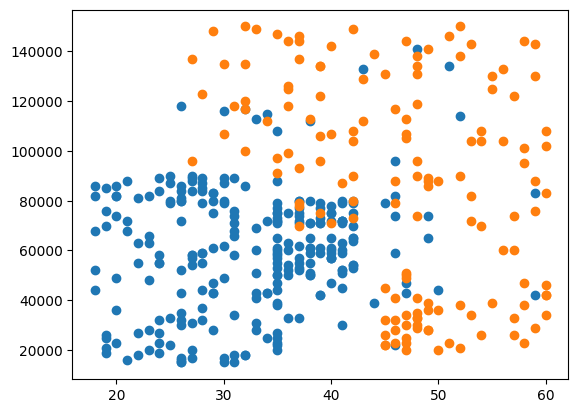

In [ ]:
plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.show()


In [ ]:
# 데이터 정규화
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_norm = (x-x_mean)/x_std


In [ ]:
# 2. 모델 정의
# -> 1 뉴런, 2 input 신경망 모델 정의
model = Sequential([
Dense(1, input_shape=(2,), activation='sigmoid')
])

In [ ]:
# 3. 모델 컴파일
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,
loss='binary_crossentropy',
metrics=['binary_accuracy'])


In [ ]:
# 4.모델 훈련
hist = model.fit(x_norm, y, epochs=100, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7913 - binary_accuracy: 0.4700
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6069 - binary_accuracy: 0.7000
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5153 - binary_accuracy: 0.8000
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4642 - binary_accuracy: 0.8475
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4346 - binary_accuracy: 0.8575
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4148 - binary_accuracy: 0.8575
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4011 - binary_accuracy: 0.8500
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3916 - binary_accuracy: 0.8525
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3838 - binary_accuracy: 0.8550
Epoch 10/100
13/13 [==========================

In [ ]:
# 5.모델 평가
model.evaluate(x_norm, y)


13/13 [==============================] - 0s 1ms/step - loss: 0.3464 - binary_accuracy: 0.8475


[0.34635430574417114, 0.8475000262260437]

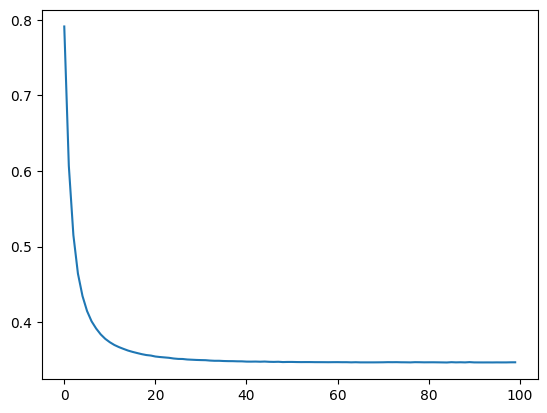

In [ ]:
# 6.모델 검증
loss = hist.history['loss']
plt.plot(loss)
plt.show()


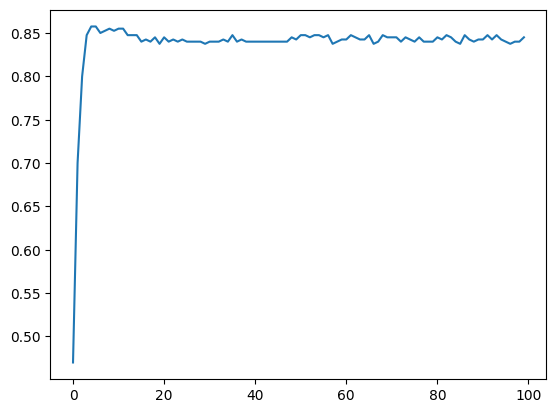

In [ ]:

acc = hist.history['binary_accuracy']
plt.plot(acc)
plt.show()


In [ ]:
# 가중치 파라미터 값 확인
w, b = model.get_weights()
print(w, b)


[[2.4354522]
 [1.2142844]] [-1.1092974]


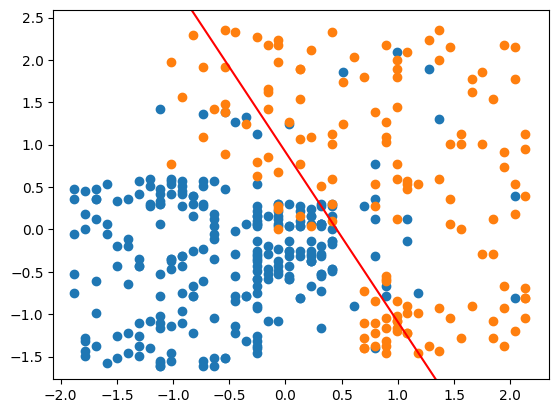

In [ ]:
# 모델 검증
xmin = x_norm.min(axis=0)
xmax = x_norm.max(axis=0)
dx = [xmin[0]*1.1, xmax[0]*1.1,
xmin[1]*1.1, xmax[1]*1.1]
x0 = x_norm[y==0]
x1 = x_norm[y==1]
z1 = np.array([-2,2])
z2 = -w[0]/w[1]*z1 - b/w[1]
plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.plot(z1, z2, 'red')
plt.axis(dx)
plt.show()

**[결과 분석]**

- x: 나이, 급여를 기반으로 binary cross entropy를 loss function으로 사용해서 SUV 구매여부를 예측한 결과,<br>
  loss값은  0.3829, accuracy는 0.84 이고,<br>
   최종 가중치 w1, w2, b의 값은 [2.4354522,1.2142844,-1.1092974] 이므로, SUV 구매 여부를 정하는 결정 경계선식은 <BR>
$2.4354522 x1 + 1.2142844 x2 -1.1092974 = 0$ (x1: 나이, x2: 소득)이다.<br>
  -> acurracy 값도 낮게 나온 편이고, layer가 1개 밖에 없어서 결정경계도 직선으로 그려지게 되다보니 분류 정확도가 떨어짐.

### 모델 수정을 통해 accuracy 값 개선하기
-입력층 노드 개수를 3개로 변경하고, 은닉층 1개 추가

In [ ]:
# 모델수정해서 재실행 - 입력층 3 노드, 은닉층 1개 추가
model2 = Sequential([
Dense(3, input_shape=(2,), activation='relu'),
Dense(1, activation='sigmoid')
])


In [ ]:
# 모델 컴파일
sgd = keras.optimizers.SGD(learning_rate=0.1)
model2.compile(optimizer=sgd,
loss='binary_crossentropy',
metrics=['binary_accuracy'])

In [ ]:
# 모델 훈련
hist2 = model2.fit(x_norm, y, epochs=100, verbose=1)


In [ ]:
# 모델 평가
model2.evaluate(x_norm, y)


13/13 [==============================] - 0s 2ms/step - loss: 0.2497 - binary_accuracy: 0.9075


[0.2497459352016449, 0.9075000286102295]

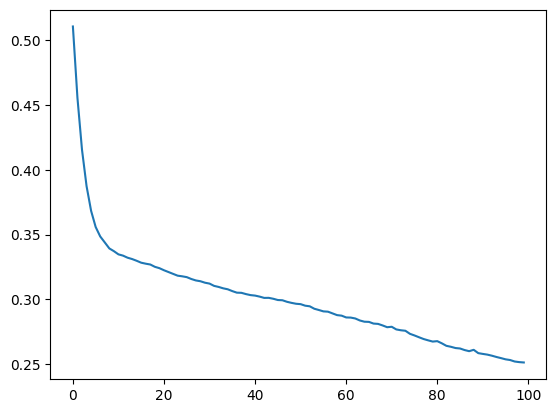

In [ ]:
# 모델 검증 - loss
loss = hist2.history['loss']
plt.plot(loss)
plt.show()


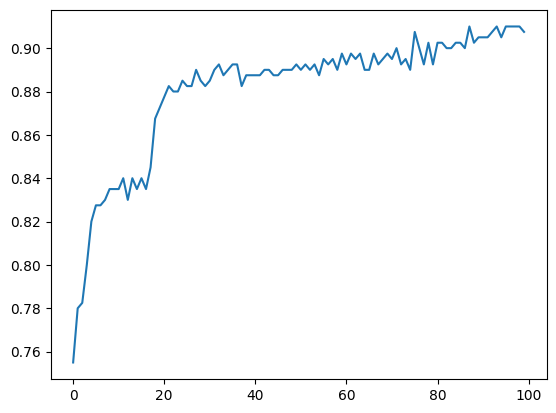

In [ ]:
# 모델 검증 - binary_accuracy
acc = hist2.history['binary_accuracy']
plt.plot(acc)
plt.show()


In [ ]:
# 모델 검증 - model
xmin = x_norm.min(axis=0)*1.1
xmax = x_norm.max(axis=0)*1.1
dx = [xmin[0], xmax[0], xmin[1], xmax[1]]
x0p, x1p = np.meshgrid(np.arange(dx[0],dx[1],0.05), np.arange(dx[2],dx[3],0.05))
z = model.predict(np.array([x0p.ravel(), x1p.ravel()]).T)
yp = (z > 0.5).astype("int32")

245/245 [==============================] - 0s 1ms/step


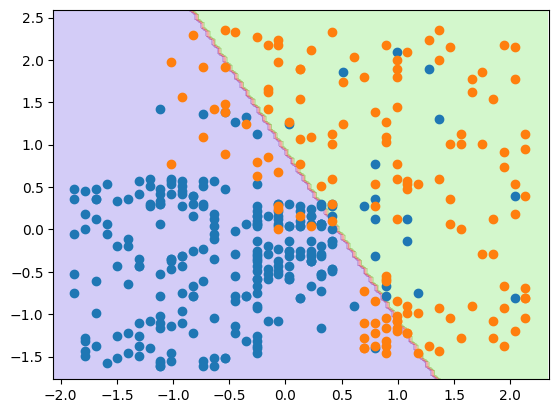

In [ ]:
plt.contourf(x0p, x1p, yp.reshape(x0p.shape), alpha=0.2, cmap=plt.cm.brg)
x0 = x_norm[y==0]
x1 = x_norm[y==1]
plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.axis(dx)
plt.show()

In [ ]:
# 모델 검증 - model2
xmin = x_norm.min(axis=0)*1.1
xmax = x_norm.max(axis=0)*1.1
dx = [xmin[0], xmax[0], xmin[1], xmax[1]]
x0p, x1p = np.meshgrid(np.arange(dx[0],dx[1],0.05), np.arange(dx[2],dx[3],0.05))
z = model2.predict(np.array([x0p.ravel(), x1p.ravel()]).T)
yp = (z > 0.5).astype("int32")

245/245 [==============================] - 1s 2ms/step


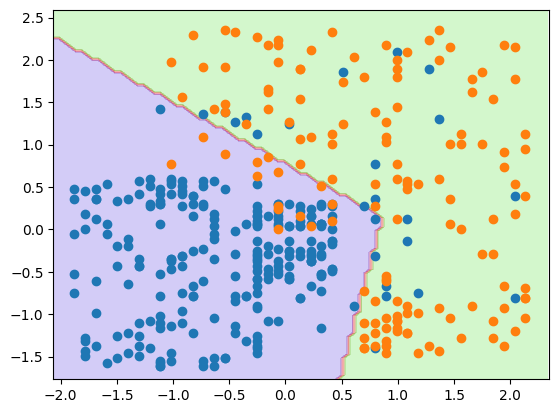

In [ ]:
plt.contourf(x0p, x1p, yp.reshape(x0p.shape), alpha=0.2, cmap=plt.cm.brg)
x0 = x_norm[y==0]
x1 = x_norm[y==1]
plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.axis(dx)
plt.show()

**[결과 분석]**

- 모델 구조를 입력층 노드 3개, 은닉층 1개로 수정하여 다시 학습한 결과,<br>
  loss값은  0.2497459352016449, accuracy는 0.9075000286102295 이 나옴
  -> 이전보다 예측 정확도가 많이 개선됨.

- 실제 모델 검증 meshgrid 그래프를 보면 첫번째 모델의 결정경계는 직선으로 나와 과소 적합 형태를 보이지만, 두번째 모델의 결정경계는 비선형 그래프로 나와 첫번째 보다는 결정경계가 비교적 정확하게 그려짐을 알 수 있다.